<h1><center>Case Study 1: Real-Time Location Systems</center></h1>
<h3><center>Steven Cocke, Hannah Kosinovsky, Tanvi Arora</center></h3>
<h3><center>September 9th, 2019</center></h3>

<h3><center>Abstract</center></h3>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this case study, data from Real-time Location System (RTLS) technology and Wi- Fi signals is used in a K Nearest Neighbor (KNN) clustering algorithm to help predict the location of a device located on the college dormitory floorplan. After the basic KNN clustering approach, a weighted formula approach is used so that the relative distance can be accounted for. 

## 1 Introduction

The floor plan has six access points that function as the fixed reference points that use Wi-Fi signals to determine location. By utilizing the fixed points and signals from the devices connecting to the routers, we can determine location of the devices anywhere in the room. In order to use KNN to find the nearest distance, we need to examine the distance of the signals strengths to the new point from all the training dataset points. This approach uses distance functions to try to categorize a value into a class. Following this, it is necessary to account for relative distance and use a weighted KNN approach.

There are 2 relevant datasets available :
1. One is a reference dataset, termed _offline_ data, that contains signal strengths measured using hand-held device on a grid of 166 points spaced 1 meter apart i nthe hallways of one floor of a building at the University of Mannheim.
2. Second set of readings, termed _online_ data, is available for testing models for predicting location. These are for 60 locations. 


## 2 Methods

Our methods consisted of two parts: a basic KNN approach and then a weighted KNN approach.

**Basic KNN approach**

In our KNN approach we used a training dataset to predict the location of our devices. The distance was estimated based on signal strength from the values in the test set to the new point. In this way we predicted the X and Y locations based on the nearest k neighbor with a default of k = 3. We use basic Euclidean distance in this method as shown below.

$S_i$ represents the strength of a signal measured between a hand-held device and an $i$-th training observation access point recorded at a specific location; while $S_1^*$ represents the signal measured between the same access point and the new point under assessment whose $(x, y)$ coordinates that is being determined.


<center>$Euclidean Distance =\sqrt{(S_1^*-S_1)^2 + ...+ (S_6^*-S_6)^2}$</center>

**Weighted KNN approach**

In our weighted KNN approach we apply weights to the distances so that closer distances have a higher impact where weight is inversely proportional to the distance (in signal strength) from the test observation. The weight formula  we used based on the text is shown below 

$$
\begin{aligned}
\frac{1/d_i}{\sum_{i=1}^{k}1/d_i}
\end{aligned}
$$


### Cross Validation 

The choice of _k_ , the number of neigbours to include in the estimate of a new observation's position, is a model selection problem. We need to pick the value of _k_ independent of our test data so that we do not overfit our model to the training data. We have run both the approaches for 11 folds, i.e. we divided our training data into 11 non-overlapping subsets of equal size. For each subset, we build the models with the data that are not in the subset and we assess the predict the locations for the subset that was left out. We repeat this model fitting for all 11 folds and aggregate the prection errors across the folds.

For each fold, we found the k-NN estimates for _k_ = 1,2,...,20 . And we aggregate the errors over the 11 folds. This was done by wrapping our code in loops over the folds and the number of neigbors. 

Cross-validation of 11 folds was applied to both the Basic KNN as well as Weighted KNN approaches. 

## 3  Results

<a id="basicknnresults"></a>
<a href="#basicknn">Code</a>

### Base KNN Approach

We have analyzed the data using K-nearest neighbours to determine locations. The floor plan shows six access points; however the data contains seven accesspoints with roughly the expected number of signals. In the analysis presented in Nolan and Lang, the access points were matched to their locations for 2 MAC-Ids. For our first analysis, we have compared the sum of squared errors from the basic KNN approach on k=5, using number of angles as 1 and 3 for 3 sets.

1 - We have considered 6 access points , excluding "00:0f:a3:39:e1:c0"  
2 - We have considered 6 access points , excluding "00:0f:a3:39:dd:cd"  
3 - We have considered all 7 access points


From the cross-validation we observed that errors decreased quiet a lot at first; for k=1,2,3; then they levelled out from k=4,5,6 and 7 , after which the errors increased gradually. So for comparisons, we choose k=5.

For comparisons, we calculated sum of square errors for num of angles 1 and 3 for k=5. Below Fig.1 is the table of Sum of Squared Errors for the 3 sets being analyzed for k=5. In the figure, calc_error_angle1 are the sum of squared errors where num of angles=1 and calc_error_angle3 are the sum of squared errors where num of angles=3.

Fig.2 is the plot for the below table of sum of squared errors for k=5

<a href="#cvbasicknn">Cross Validation plots</a>

<img src="images/KNN obs table.png">

<center>Fig. 1. Table of observations of sum of squared errors for K = 5  </center> 

<img src="images/KNN obs k = 5.png">

<center>Fig. 2. Plot of observations of sum of squared errors for k = 5 </center>

From Fig.1 and Fig.2 , **we can observe that for the basic KNN approach, while k = 5, number of angles = 3 , and access points = 7 provided the smallest sum of squared error when compared to number of angles = 1.**

Below Fig.3 is the plot of Actual vs predicted values using Basic KNN approach for k=5 for the best case.

<img src="images/floor map k = 5.png">

<center>Fig. 3. Plot of actual versus predicted locations of devices via Basic KNN approach on floormap. In the plot the black dots represent the test locations, the asterisks represent the predicted locations and the red lines show the distance between the test and predicted locations.  </center>

<a id="weightedknnresults"></a>
<a href="#weightedknn">Code</a>
### Weighted KNN Approach

In the weighted KNN approach, we are comparing across the three same cases as above:

1 - We have considered 6 access points , excluding "00:0f:a3:39:e1:c0"  
2 - We have considered 6 access points , excluding "00:0f:a3:39:dd:cd"  
3 - We have considered all 7 access points

From the cross-validation we observed that errors decreased quiet a lot at first; for k=1,2,3; then they levelled out from k=4,5,6 and 7 , after which the errors increased gradually. So for comparisons, we choose k=5.

For comparisons, we calculated sum of square errors for num of angles 1 and 3 for k=5. Below Fig.4 is the table of Sum of Squared Errors for the 3 sets being analyzed for k=5. In the figure, weighted_calc_error_angle1 are the sum of squared errors where num of angles=1 and weighted_calc_error_angle3 are the sum of squared errors where num of angles=3.

Fig.5 is the plot for the below table of sum of squared errors for k=5.

<a href="#cvweightedknn">Cross Validation plots</a>

<img src="images/wieghted KNN obs table.png">

<center>Fig. 4. Table of observations of sum of squared errors for K = 5 </center>

<img src="images/weighted KNN obs = 5.png">

<center>Fig. 5. Plot of observations of sum of squared errors for k = 5 </center>

From Fig.1 and Fig.2 , **we can observe that for the Weighted KNN approach, while k = 5, number of angles = 3 , and access points = 7 provided the smallest sum of squared error when compared to number of angles = 1.**

Below Fig.3 is the plot of Actual vs predicted values using Basic KNN approach for k=5 for the best case.

<img src="images/weighted floormap k = 5.png">

<center>Fig. 6. Plot of actual versus predicted locations of devices using weighted KNN approach on floormap. In the plot the black dots represent the test locations, the asterisks represent the predicted locations and the red lines show the distance between the test and predicted locations.  </center>

Overal comparing the Basic KNN and Weighted KNN aprroach,**Weighted KNN approach gave better results than the base KNN approach.**

## 4 Conclusions

Predictions when trained including "00:0f:a3:39:e1:c0" access point gave the maximum sum of squared errors in comparison to when trained including 00:0f:a3:39:dd:cd". Also the Sum of Squared Errors reduced when num of angles was increased from 1 to 3. This was observed for both Basic KNN as well as for Weighted KNN approaches. 

The weighted KNN approach gave better results than the base KNN approach. The SSE for weighted KNN = **209.2**, while the base KNN = **228.3**. 

Also, in both cases, the best results were achieved when the access points = 7 i.e all 7 access points we were included to train the model.

## 5 References

Nolan, Deborah. Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving (Chapman & Hall/CRC The R Series) ("Part 1: Predicting Location via Indoor Positioning Systems"). CRC Press. Kindle Edition. 

The data that is available for the Nolan and Lang textbook website: 
http://rdatasciencecases.org/Data/offline.final.trace.txt



## 6 Code
<a id='Code'></a>

In [4]:
## download data files from web
download.file('http://rdatasciencecases.org/Data/offline.final.trace.txt','offline.final.trace.txt', method="curl", quiet=FALSE , mode="w", cacheOK=TRUE)
download.file('http://rdatasciencecases.org/Data/online.final.trace.txt','online.final.trace.txt', method="curl", quiet=FALSE , mode="w", cacheOK=TRUE)

In [5]:
# put it all together to process a line as a function
# note that the if statement handles null values to remove warnings
processLine = function(x)
{
  tokens = strsplit(x, "[;=,]")[[1]]
if (length(tokens) == 10)
  return(NULL)
tmp = matrix(tokens[ - (1:10) ], , 4, byrow = TRUE)
cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow(tmp), 6,
byrow = TRUE), tmp)
}


# create a function that will round off to the nearest major angle
roundOrientation = function(angles) {
  refs = seq(0, by = 45, length  = 9)
  q = sapply(angles, function(o) which.min(abs(o - refs)))
  c(refs[1:8], 0)[q]
}


# re do our data read combining all the anlysis we did here there are 7 SEVEN macids
readData = 
  function(filename = 'offline.final.trace.txt', 
           subMacs = c("00:0f:a3:39:e1:c0", "00:0f:a3:39:dd:cd", "00:14:bf:b1:97:8a",
                       "00:14:bf:3b:c7:c6", "00:14:bf:b1:97:90", "00:14:bf:b1:97:8d",
                       "00:14:bf:b1:97:81"))
  {
    txt = readLines(filename)
    lines = txt[ substr(txt, 1, 1) != "#" ]
    tmp = lapply(lines, processLine)
    offline = as.data.frame(do.call("rbind", tmp), 
                            stringsAsFactors= FALSE) 
    
    names(offline) = c("time", "scanMac", 
                       "posX", "posY", "posZ", "orientation", 
                       "mac", "signal", "channel", "type")
    
     # keep only signals from access points
    offline = offline[ offline$type == "3", ]
    
    # drop scanMac, posZ, channel, and type - no info in them
    dropVars = c("scanMac", "posZ", "channel", "type")
    offline = offline[ , !( names(offline) %in% dropVars ) ]
    
    # drop more unwanted access points
    offline = offline[ offline$mac %in% subMacs, ]
    
    # convert numeric values
    numVars = c("time", "posX", "posY", "orientation", "signal")
    offline[ numVars ] = lapply(offline[ numVars ], as.numeric)

    # convert time to POSIX
    offline$rawTime = offline$time
    offline$time = offline$time/1000
    class(offline$time) = c("POSIXt", "POSIXct")
    
    # round orientations to nearest 45
    offline$angle = roundOrientation(offline$orientation)
      
    return(offline)
  }


#### Read offline data that will form the training dataset

In [6]:
# implement our function
offline = readData()


In [7]:
head(offline)

time,posX,posY,orientation,mac,signal,rawTime,angle
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8a,-38,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:90,-56,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8d,-65,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:81,-65,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,1.139643e+12,0


In [8]:
unique(offline$mac)

[1] "00:14:bf:b1:97:8a" "00:14:bf:b1:97:90" "00:0f:a3:39:e1:c0"
[4] "00:14:bf:b1:97:8d" "00:14:bf:b1:97:81" "00:14:bf:3b:c7:c6"
[7] "00:0f:a3:39:dd:cd"

In [9]:
# examine signal strength overall
summary(offline$signal)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -98.00  -67.00  -59.00  -59.92  -53.00  -25.00 

In [10]:
subMacs = c("00:0f:a3:39:e1:c0", "00:0f:a3:39:dd:cd", "00:14:bf:b1:97:8a",
                       "00:14:bf:3b:c7:c6", "00:14:bf:b1:97:90", "00:14:bf:b1:97:8d",
                       "00:14:bf:b1:97:81")


In [11]:
#Setup all the data using the data summary
offline$posXY = paste(offline$posX, offline$posY, sep = "-")

byLocAngleAP = with(offline, 
                    by(offline, list(posXY, angle, mac), 
                       function(x) x))

signalSummary = 
  lapply(byLocAngleAP,            
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })

offlineSummary = do.call("rbind", signalSummary)  

In [12]:
head(offlineSummary)

,time,posX,posY,orientation,mac,signal,rawTime,angle,posXY,medSignal,avgSignal,num,sdSignal,iqrSignal
7,2006-02-10 23:31:58,0,0,0.0,00:0f:a3:39:dd:cd,-75,1.139643e+12,0,0-0,-67,-68.12613,111,3.159739,4.5
24512,2006-02-11 00:03:44,0,1,0.7,00:0f:a3:39:dd:cd,-73,1.139645e+12,0,0-1,-70,-70.33636,110,2.420392,3.0
221777,2006-02-11 03:46:02,0,10,0.9,00:0f:a3:39:dd:cd,-69,1.139658e+12,0,0-10,-67,-69.24324,111,4.407053,6.5
229191,2006-02-11 03:54:05,0,11,0.4,00:0f:a3:39:dd:cd,-72,1.139659e+12,0,0-11,-73,-74.30631,111,5.396620,7.0
236493,2006-02-11 04:02:32,0,12,0.2,00:0f:a3:39:dd:cd,-72,1.139659e+12,0,0-12,-70,-69.57895,114,2.372015,3.0
243546,2006-02-11 04:14:12,0,13,0.1,00:0f:a3:39:dd:cd,-69,1.139660e+12,0,0-13,-74,-73.58716,109,3.493939,4.0


In [13]:
unique(offlineSummary$mac)

[1] "00:0f:a3:39:dd:cd" "00:0f:a3:39:e1:c0" "00:14:bf:3b:c7:c6"
[4] "00:14:bf:b1:97:81" "00:14:bf:b1:97:8a" "00:14:bf:b1:97:8d"
[7] "00:14:bf:b1:97:90"

**mac ids that are similar are  :**

"00:0f:a3:39:e1:c0"   
"00:0f:a3:39:dd:cd" 

In [14]:
# here is where we drop a macid
offlineSummary1 = subset(offlineSummary, mac != subMacs[1])
offlineSummary2 = subset(offlineSummary, mac != subMacs[2])

In [15]:
unique(offlineSummary1$mac)
unique(offlineSummary2$mac)

[1] "00:0f:a3:39:dd:cd" "00:14:bf:3b:c7:c6" "00:14:bf:b1:97:81"
[4] "00:14:bf:b1:97:8a" "00:14:bf:b1:97:8d" "00:14:bf:b1:97:90"

[1] "00:0f:a3:39:e1:c0" "00:14:bf:3b:c7:c6" "00:14:bf:b1:97:81"
[4] "00:14:bf:b1:97:8a" "00:14:bf:b1:97:8d" "00:14:bf:b1:97:90"

In [16]:
# Look at the access points
# signal strength vs distance

AP1 = matrix( c( 7.5, 6.3, 2.5, -.8, 12.8, -2.8,  
                1, 14, 33.5, 9.3,  33.5, 2.8),
            ncol = 2, byrow = TRUE,
            dimnames = list(subMacs[ -1 ], c("x", "y") ))

AP2 = matrix( c( 7.5, 6.3, 2.5, -.8, 12.8, -2.8,  
                1, 14, 33.5, 9.3,  33.5, 2.8),
            ncol = 2, byrow = TRUE,
            dimnames = list(subMacs[ -2 ], c("x", "y") ))

AP = matrix( c( 7.5, 6.3, 7.5, 6.3,2.5, -.8, 12.8, -2.8,  
                1, 14, 33.5, 9.3,  33.5, 2.8),
            ncol = 2, byrow = TRUE,
            dimnames = list(subMacs, c("x", "y") ))


AP1
AP2
AP

,x,y
00:0f:a3:39:dd:cd,7.5,6.3
00:14:bf:b1:97:8a,2.5,-0.8
00:14:bf:3b:c7:c6,12.8,-2.8
00:14:bf:b1:97:90,1.0,14.0
00:14:bf:b1:97:8d,33.5,9.3
00:14:bf:b1:97:81,33.5,2.8


,x,y
00:0f:a3:39:e1:c0,7.5,6.3
00:14:bf:b1:97:8a,2.5,-0.8
00:14:bf:3b:c7:c6,12.8,-2.8
00:14:bf:b1:97:90,1.0,14.0
00:14:bf:b1:97:8d,33.5,9.3
00:14:bf:b1:97:81,33.5,2.8


,x,y
00:0f:a3:39:e1:c0,7.5,6.3
00:0f:a3:39:dd:cd,7.5,6.3
00:14:bf:b1:97:8a,2.5,-0.8
00:14:bf:3b:c7:c6,12.8,-2.8
00:14:bf:b1:97:90,1.0,14.0
00:14:bf:b1:97:8d,33.5,9.3
00:14:bf:b1:97:81,33.5,2.8


In [17]:
macs1 = subMacs[-1]
macs2 = subMacs[-2]
macs = subMacs

In [18]:
# tally signal strength

#online = readData("online.final.trace.txt", subMacs = macs)
online = readData("online.final.trace.txt")
online$posXY = paste(online$posX, online$posY, sep = "-")

length(unique(online$posXY))
head(online)
tabonlineXYA = table(online$posXY, online$angle)
tabonlineXYA[1:6, ]

get_onlineSummary = function(data,include_mac){

    keepVars = c("posXY", "posX","posY", "orientation", "angle")
    online=online[online$mac %in% include_mac,]
    byLoc = with(online, 
                 by(online, list(posXY,angle ), 
                    function(x) {
                      ans = x[1, keepVars]
                      avgSS = tapply(x$signal, x$mac, mean)
                      y = matrix(avgSS, nrow = 1, ncol = length(include_mac),
                            dimnames = list(ans$posXY, names(avgSS)))
                      cbind(ans, y)
                    }))

    onlineSummary = do.call("rbind", byLoc)
    return(onlineSummary)
    }

onlineSummary=get_onlineSummary(online,macs)
onlineSummary1=get_onlineSummary(online,macs1)
onlineSummary2=get_onlineSummary(online,macs2)
head(onlineSummary)
head(onlineSummary1)
head(onlineSummary2)

[1] 60

time,posX,posY,orientation,mac,signal,rawTime,angle,posXY
2006-02-11 13:14:37,0,0.05,130.5,00:14:bf:b1:97:8a,-43,1.139692e+12,135,0-0.05
2006-02-11 13:14:37,0,0.05,130.5,00:0f:a3:39:e1:c0,-52,1.139692e+12,135,0-0.05
2006-02-11 13:14:37,0,0.05,130.5,00:14:bf:3b:c7:c6,-62,1.139692e+12,135,0-0.05
2006-02-11 13:14:37,0,0.05,130.5,00:14:bf:b1:97:81,-58,1.139692e+12,135,0-0.05
2006-02-11 13:14:37,0,0.05,130.5,00:14:bf:b1:97:8d,-62,1.139692e+12,135,0-0.05
2006-02-11 13:14:37,0,0.05,130.5,00:14:bf:b1:97:90,-57,1.139692e+12,135,0-0.05


            
               0  45  90 135 180 225 270 315
  0-0.05       0   0   0 704   0   0   0   0
  0.15-9.42    0   0 717   0   0   0   0   0
  0.31-11.09   0   0   0   0   0 684   0   0
  0.47-8.2   701   0   0   0   0   0   0   0
  0.78-10.94 695   0   0   0   0   0   0   0
  0.93-11.69   0   0   0   0 691   0   0   0

,posXY,posX,posY,orientation,angle,00:0f:a3:39:dd:cd,00:0f:a3:39:e1:c0,00:14:bf:3b:c7:c6,00:14:bf:b1:97:81,00:14:bf:b1:97:8a,00:14:bf:b1:97:8d,00:14:bf:b1:97:90
5923,0.47-8.2,0.47,8.20,5.8,0,-74.15315,-49.50000,-64.25806,-72.59770,-45.65289,-60.79747,-49.58000
8756,0.78-10.94,0.78,10.94,348.3,0,-71.40367,-53.26364,-66.96000,-66.80952,-48.41379,-65.00000,-54.84694
22032,1.52-9.32,1.52,9.32,7.0,0,-65.38318,-50.36697,-63.35922,-67.48913,-50.04167,-65.10345,-49.38542
19504,12.55-7.38,12.55,7.38,20.9,0,-59.17273,-41.66972,-52.32941,-58.08791,-62.24038,-51.67327,-68.34940
45746,23.24-7.5,23.24,7.50,7.9,0,-79.59259,-56.48182,-59.52874,-53.79348,-65.22772,-56.66316,-69.67391
34679,23.9-7,23.90,7.00,344.9,0,-78.04762,-57.51852,-61.65556,-54.16495,-64.83333,-58.33735,-69.24468


,posXY,posX,posY,orientation,angle,00:0f:a3:39:dd:cd,00:14:bf:3b:c7:c6,00:14:bf:b1:97:81,00:14:bf:b1:97:8a,00:14:bf:b1:97:8d,00:14:bf:b1:97:90
5923,0.47-8.2,0.47,8.20,5.8,0,-74.15315,-64.25806,-72.59770,-45.65289,-60.79747,-49.58000
8756,0.78-10.94,0.78,10.94,348.3,0,-71.40367,-66.96000,-66.80952,-48.41379,-65.00000,-54.84694
22032,1.52-9.32,1.52,9.32,7.0,0,-65.38318,-63.35922,-67.48913,-50.04167,-65.10345,-49.38542
19505,12.55-7.38,12.55,7.38,20.9,0,-59.17273,-52.32941,-58.08791,-62.24038,-51.67327,-68.34940
45746,23.24-7.5,23.24,7.50,7.9,0,-79.59259,-59.52874,-53.79348,-65.22772,-56.66316,-69.67391
34679,23.9-7,23.90,7.00,344.9,0,-78.04762,-61.65556,-54.16495,-64.83333,-58.33735,-69.24468


,posXY,posX,posY,orientation,angle,00:0f:a3:39:e1:c0,00:14:bf:3b:c7:c6,00:14:bf:b1:97:81,00:14:bf:b1:97:8a,00:14:bf:b1:97:8d,00:14:bf:b1:97:90
5923,0.47-8.2,0.47,8.20,5.8,0,-49.50000,-64.25806,-72.59770,-45.65289,-60.79747,-49.58000
8756,0.78-10.94,0.78,10.94,348.3,0,-53.26364,-66.96000,-66.80952,-48.41379,-65.00000,-54.84694
22032,1.52-9.32,1.52,9.32,7.0,0,-50.36697,-63.35922,-67.48913,-50.04167,-65.10345,-49.38542
19504,12.55-7.38,12.55,7.38,20.9,0,-41.66972,-52.32941,-58.08791,-62.24038,-51.67327,-68.34940
45746,23.24-7.5,23.24,7.50,7.9,0,-56.48182,-59.52874,-53.79348,-65.22772,-56.66316,-69.67391
34679,23.9-7,23.90,7.00,344.9,0,-57.51852,-61.65556,-54.16495,-64.83333,-58.33735,-69.24468


In [19]:
length(onlineSummary2$posXY)

[1] 60

In [20]:
head(online)

time,posX,posY,orientation,mac,signal,rawTime,angle,posXY
2006-02-11 13:14:37,0,0.05,130.5,00:14:bf:b1:97:8a,-43,1.139692e+12,135,0-0.05
2006-02-11 13:14:37,0,0.05,130.5,00:0f:a3:39:e1:c0,-52,1.139692e+12,135,0-0.05
2006-02-11 13:14:37,0,0.05,130.5,00:14:bf:3b:c7:c6,-62,1.139692e+12,135,0-0.05
2006-02-11 13:14:37,0,0.05,130.5,00:14:bf:b1:97:81,-58,1.139692e+12,135,0-0.05
2006-02-11 13:14:37,0,0.05,130.5,00:14:bf:b1:97:8d,-62,1.139692e+12,135,0-0.05
2006-02-11 13:14:37,0,0.05,130.5,00:14:bf:b1:97:90,-57,1.139692e+12,135,0-0.05


In [21]:
length(unique(online$posXY))
length(unique(online$posXY,online$angle))

[1] 60

[1] 60

In [22]:
# create data frame and functions to aggregate/select data with similar angles
# including from training dataset only those observations that were recorded in 45 degree increments 
# that are 'm' nearest to the observation we are interested in

reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY")) {
  num_macs=length(unique(data$mac))
 

    byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = num_macs,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}


#trainSS = reshapeSS(offlineSubset, varSignal = "avgSignal",7)

selectTrain = function(angleNewObs,  signals = NULL, m = 1){
  # m is the number of angles to keep between 1 and 5
  refs = seq(0, by = 45, length  = 8)
  nearestAngle = roundOrientation(angleNewObs)
  
  if (m %% 2 == 1){ 
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  } else {
    m = m + 1
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
    if (sign(angleNewObs - nearestAngle) > -1) 
      angles = angles[ -1 ]
    else 
      angles = angles[ -m ]
  }
  angles = angles + nearestAngle
  angles[angles < 0] = angles[ angles < 0 ] + 360
  angles[angles > 360] =     angles[ angles > 360 ] - 360
  angles = sort(angles) 

  offlineSubset = signals[ signals$angle %in% angles, ]
  reshapeSS(offlineSubset, varSignal = "avgSignal")
}

train130 = selectTrain(130, offlineSummary, m = 3)

head(train130)

length(train130[[1]])

,posXY,posX,posY,00:0f:a3:39:dd:cd,00:0f:a3:39:e1:c0,00:14:bf:3b:c7:c6,00:14:bf:b1:97:81,00:14:bf:b1:97:8a,00:14:bf:b1:97:8d,00:14:bf:b1:97:90
0-0,0-0,0,0,-71.76555,-52.37243,-66.13039,-63.19262,-35.58063,-64.25411,-55.33780
0-1,0-1,0,1,-70.47375,-52.98182,-65.37177,-63.72941,-39.37649,-65.44867,-59.15328
0-10,0-10,0,10,-70.12946,-56.34184,-65.67238,-69.16041,-44.71545,-66.85781,-50.45502
0-11,0-11,0,11,-70.62604,-54.73420,-67.17593,-70.34538,-48.34689,-66.78383,-54.93054
0-12,0-12,0,12,-68.84840,-56.03030,-70.46493,-72.28758,-45.17264,-66.72696,-50.49886
0-13,0-13,0,13,-73.49886,-54.55152,-71.19211,-72.58496,-43.32784,-68.72616,-54.48160


[1] 166

<a id="basicknn"></a>
<a href="#basicknnresults">Back to Top</a>
#### Basic KNN function

In [23]:
# here is our NN function.
findNN = function(newSignal, trainSubset,num_macs) {
  num_cols=3+num_macs

  diffs = apply(trainSubset[ , 4:num_cols], 1, 
                function(x) x - newSignal)
  dists = apply(diffs, 2, function(x) sqrt(sum(x^2)) )

  closest = order(dists)
  return(trainSubset[closest, 1:3 ])
}
                


In [24]:
# predict X-Y based on the the neasest k neighbors (default 3)
predXY = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  num_macs=ncol(newSignals)

  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)

    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS,num_macs)
  }

  estXY = lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) mean(x[1:k])))
                                    estXY = do.call("rbind", estXY)
  return(estXY)

}
                                    

In [25]:

options(error = recover, warn = 1)
calcError = 
function(estXY, actualXY) 
   sum( rowSums( (estXY - actualXY)^2) )


reshapeSS_v2 = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY"),
                     sampleAngle = FALSE, 
                     refs = seq(0, 315, by = 45)) {
 num_macs=length(unique(data$mac))
    byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    if (sampleAngle) {
                      x = x[x$angle == sample(refs, size = 1), ]}
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = num_macs,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}



In [26]:
# up to 20 neighbors, 11 folds
# this one can run for a while (5-10 mins)
# this cell and the next are the same, but the angles change slightly!!
offline1 = offline[ offline$mac != "00:0f:a3:39:e1:c0", ]
offline2 = offline[ offline$mac != "00:0f:a3:39:dd:cd", ]

cvfold_calcerror = function(onlineSummary,offlineSummary,offline,num_angles,num_macs){
keepVars = c("posXY", "posX","posY", "orientation", "angle")

actualXY = onlineSummary[ , c("posX", "posY")]

v = length(onlineSummary)
num_cols=5+num_macs
permuteLocs = sample(unique(offlineSummary$posXY))
permuteLocs = matrix(permuteLocs, ncol = v, 
                     nrow = floor(length(permuteLocs)/v))

onlineFold = subset(offlineSummary, posXY %in% permuteLocs[ , 1])

onlineCVSummary = reshapeSS_v2(offline, keepVars = keepVars, 
                            sampleAngle = TRUE)

onlineFold = subset(onlineCVSummary, 
                    posXY %in% permuteLocs[ , 1])

offlineFold = subset(offlineSummary,
                     posXY %in% permuteLocs[ , -1])


K = 20
err = rep(0, K)

for (j in 1:v) {
  onlineFold = subset(onlineCVSummary, 
                      posXY %in% permuteLocs[ , j])
  offlineFold = subset(offlineSummary,
                       posXY %in% permuteLocs[ , -j])
  actualFold = onlineFold[ , c("posX", "posY")]
  
  for (k in 1:K) {
    estFold = predXY(newSignals = onlineFold[ , 6:num_cols],
                     newAngles = onlineFold[ , 4], 
                     offlineFold, numAngles = num_angles, k = k)
    err[k] = err[k] + calcError(estFold, actualFold)
  }
}


plot(y = err, x = (1:K),  type = "l", lwd= 2,
     ylim = c(800, 2100),
     xlab = "Number of Neighbors",
     ylab = "Sum of Square Errors")

rmseMin = min(err)
kMin = which(err == rmseMin)[1]
segments(x0 = 0, x1 = kMin, y0 = rmseMin, col = gray(0.4), 
         lty = 2, lwd = 2)
segments(x0 = kMin, x1 = kMin, y0 = 1100,  y1 = rmseMin, 
         col = grey(0.4), lty = 2, lwd = 2)


text(x = kMin - 2, y = rmseMin + 40, 
     label = as.character(round(rmseMin)), col = grey(0.4))


estXYk5 = predXY(newSignals = onlineSummary[ , 6:num_cols], 
                 newAngles = onlineSummary[ , 4], 
                 offlineSummary, numAngles = num_angles, k = 5)


print(calcError(estXYk5, actualXY))
}





<a id="cvbasicknn"></a>
### Basic KNN Cross Validations on 11 folds and upto 20 neighbors

#### cvfold on dataset with macid="00:0f:a3:39:e1:c0" included , for num of angles=1

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
“data length [166] is not a sub-multiple or multiple of the number of rows [15]”

[1] 417.1843


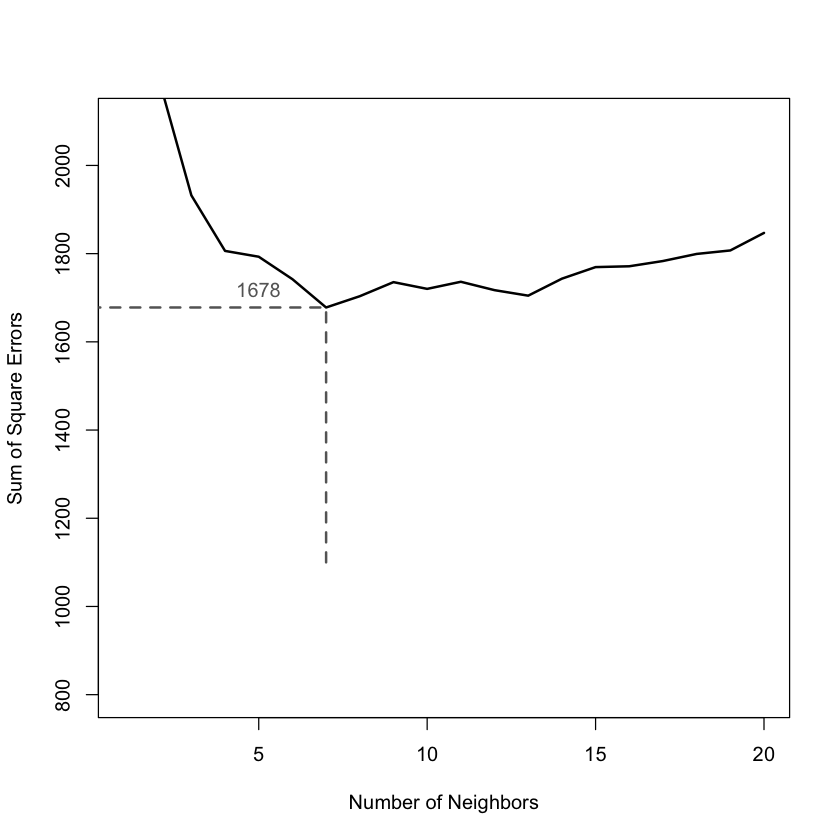

In [27]:
cvfold_calcerror(onlineSummary2,offlineSummary2,offline2,1,6)

#### cvfold on dataset with macid="00:0f:a3:39:e1:c0" included , for num of angles=3

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
“data length [166] is not a sub-multiple or multiple of the number of rows [15]”

[1] 275.5083


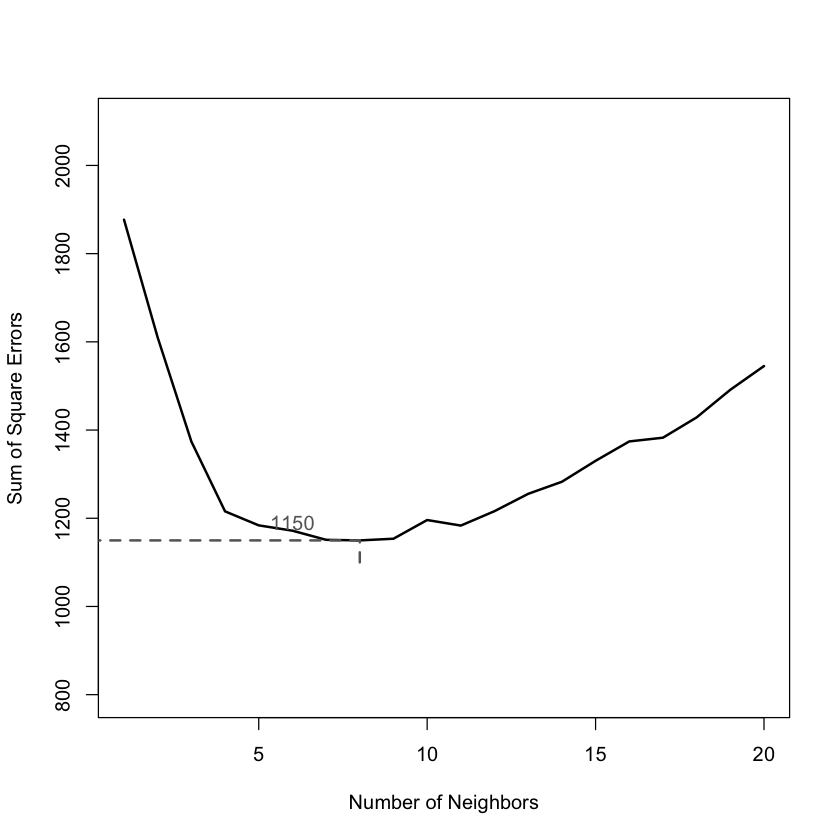

In [28]:
cvfold_calcerror(onlineSummary2,offlineSummary2,offline2,3,6)

#### cvfold on dataset with macid="00:0f:a3:39:dd:cd" included , for num of angles=1

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
“data length [166] is not a sub-multiple or multiple of the number of rows [15]”

[1] 290.8883


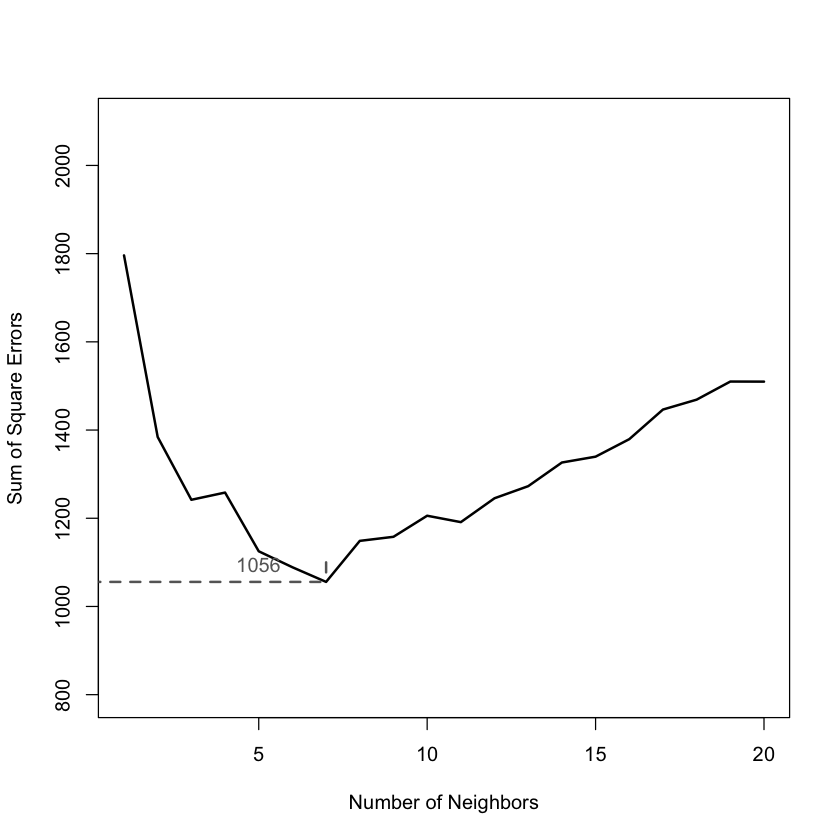

In [29]:
cvfold_calcerror(onlineSummary1,offlineSummary1,offline1,1,6)

#### cvfold on dataset with macid="00:0f:a3:39:dd:cd"  included , for num of angles=3

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
“data length [166] is not a sub-multiple or multiple of the number of rows [15]”

[1] 249.9243


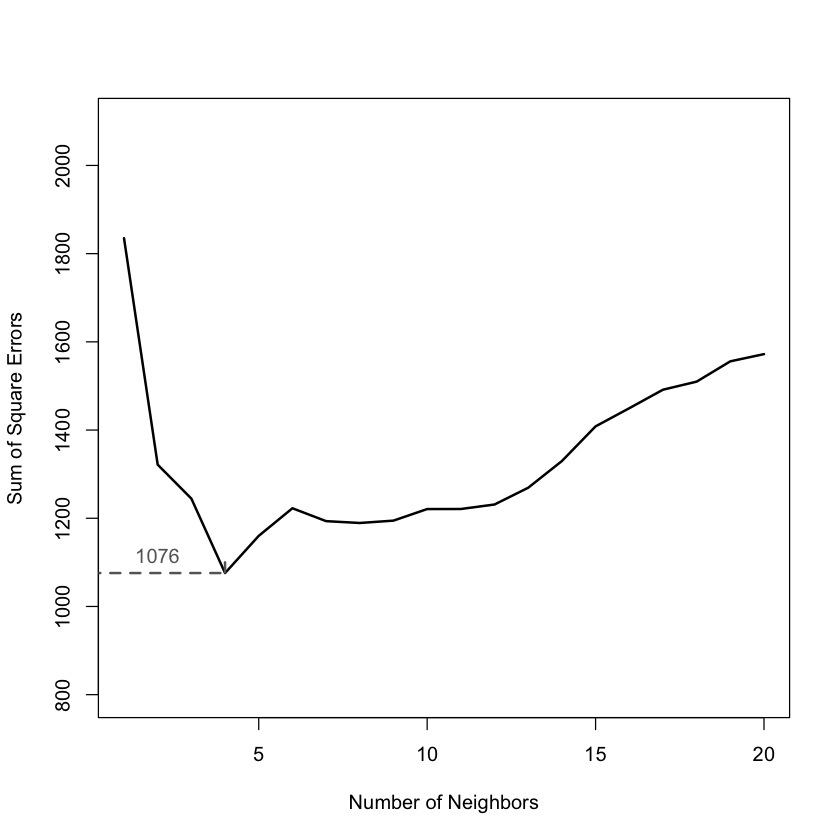

In [30]:
cvfold_calcerror(onlineSummary1,offlineSummary1,offline1,3,6)

#### cvfold on dataset with all 7 access points included , for num of angles=1

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
“data length [166] is not a sub-multiple or multiple of the number of rows [13]”

[1] 228.9283


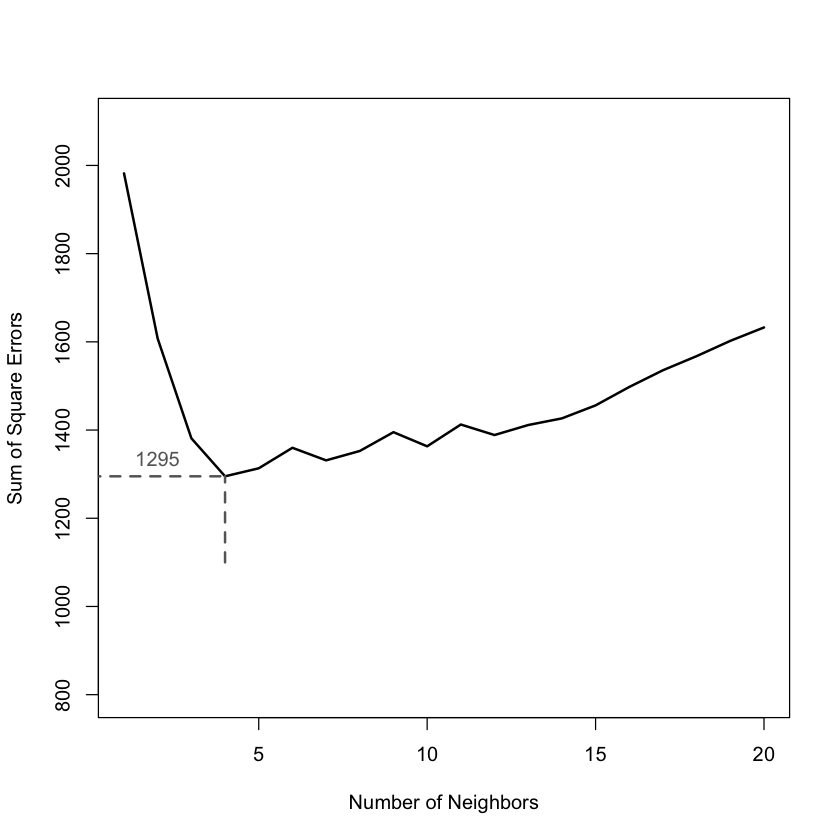

In [31]:
cvfold_calcerror(onlineSummary,offlineSummary,offline,1,6)

#### cvfold on dataset with all 7 access points included , for num of angles=3

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
“data length [166] is not a sub-multiple or multiple of the number of rows [13]”

[1] 228.3443


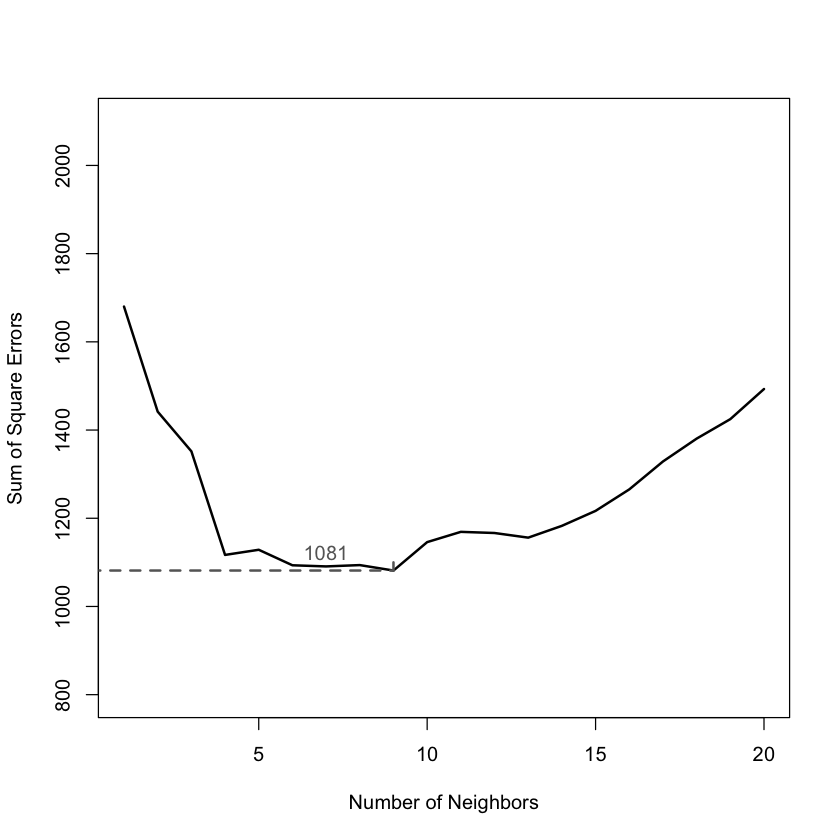

In [32]:
cvfold_calcerror(onlineSummary,offlineSummary,offline,3,6)

<a href="#basicknnresults">Back to Basic KNN Results</a>

#### Table of Calc Error Observations

In [33]:
macs_observed=c("00:0f:a3:39:dd:cd", "00:0f:a3:39:e1:c0" ,   "all" )
calc_error_angle1=c(290.88,417.18,228.93)
calc_error_angle3=c(249.92,275.51,228.34)

In [34]:
calc_error_table=cbind(macs_observed,calc_error_angle1,calc_error_angle3)
calc_error_table

macs_observed,calc_error_angle1,calc_error_angle3
00:0f:a3:39:dd:cd,290.88,249.92
00:0f:a3:39:e1:c0,417.18,275.51
all,228.93,228.34


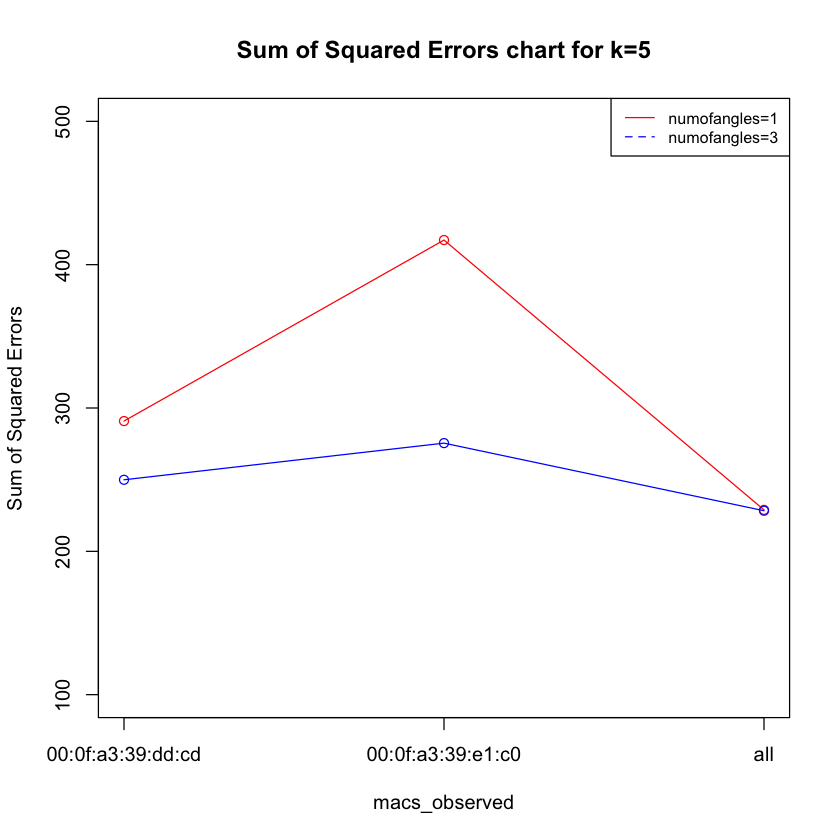

In [35]:
plot(calc_error_angle1, type='o',col="red",xlab = "macs_observed",ylab="Sum of Squared Errors",main="Sum of Squared Errors chart for k=5", xaxt = "n", ,ylim=range(100:500))
lines(calc_error_angle3, type="o", col="blue")
axis(1, at=1:3, labels=macs_observed[1:3])
legend("topright", legend=c("numofangles=1", "numofangles=3"), col=c("red", "blue"), lty=1:2, cex=0.8)

From the above plot , we observe that the sum of errors is minimum when we include both the mac-ids. Values are similar for num of angles =1 or num of angles=3

#### Next we will plot the original and expected values for k=3 and k=1 for the case when we include both the mac-ids

In [36]:
# predict and map errors
floorErrorMap = function(estXY, actualXY, trainPoints = NULL, AP = NULL){
  
    plot(0, 0, xlim = c(0, 35), ylim = c(-3, 15), type = "n",
         xlab = "posX", ylab = "posY", axes = FALSE, main="Actual vs Pred values for k")
    box()
    if ( !is.null(AP) ) points(AP, pch = 15)
    if ( !is.null(trainPoints) )
      points(trainPoints, pch = 19, col="grey", cex = 0.6)
    
    points(x = actualXY[, 1], y = actualXY[, 2], 
           pch = 19, cex = 0.8 )
    points(x = estXY[, 1], y = estXY[, 2], 
           pch = 8, cex = 0.8 )
    segments(x0 = estXY[, 1], y0 = estXY[, 2],
             x1 = actualXY[, 1], y1 = actualXY[ , 2],
             lwd = 2, col = "red")
}


# nearest 3 neighbors                                    
                                   
estXYk3 = predXY(newSignals = onlineSummary[ , 6:12], 
                 newAngles = onlineSummary[ , 4], 
                 offlineSummary, numAngles = 3, k = 3)

# nearest neighbor
estXYk1= predXY(newSignals = onlineSummary[ , 6:12], 
                 newAngles = onlineSummary[ , 4], 
                 offlineSummary, numAngles = 3, k = 1)
                                    
 # nearest neighbor 5
estXYk5= predXY(newSignals = onlineSummary[ , 6:12], 
                 newAngles = onlineSummary[ , 4], 
                 offlineSummary, numAngles = 3, k = 5)

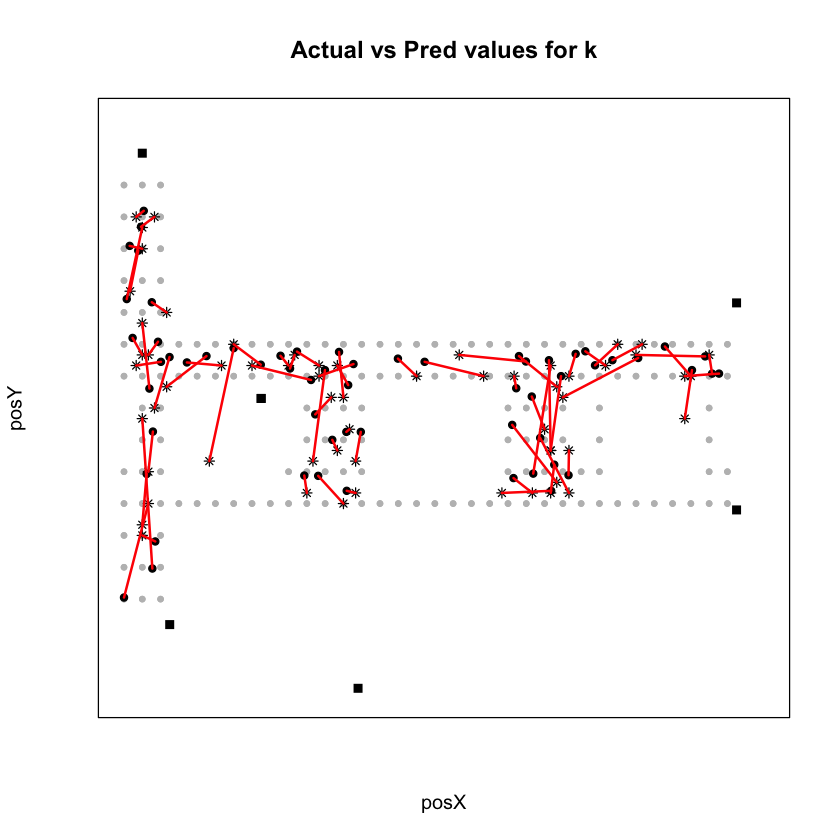

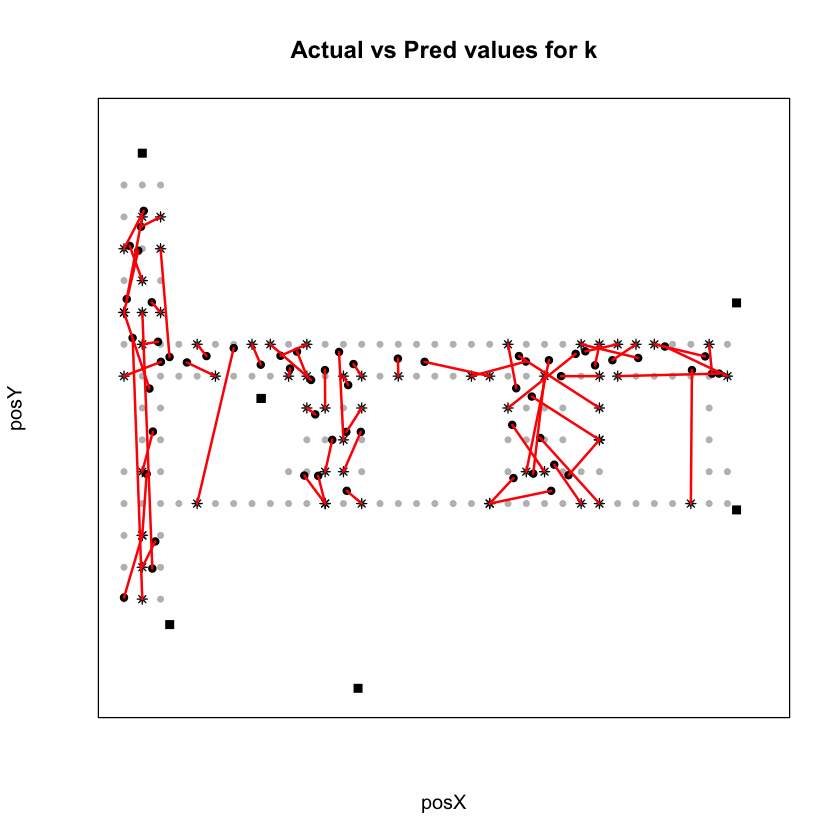

In [37]:
macs_observed=c("00:0f:a3:39:e1:c0" ,  "00:0f:a3:39:dd:cd" )
trainPoints = offlineSummary[ offlineSummary$angle == 0 & 
                              offlineSummary$mac %in% macs_observed ,
                        c("posX", "posY")]

# 3 NN

floorErrorMap(estXYk3, onlineSummary[ , c("posX","posY")], 
              trainPoints = trainPoints, AP = AP)


# 1 NN
floorErrorMap(estXYk1, onlineSummary[ , c("posX","posY")], 
              trainPoints = trainPoints, AP = AP)


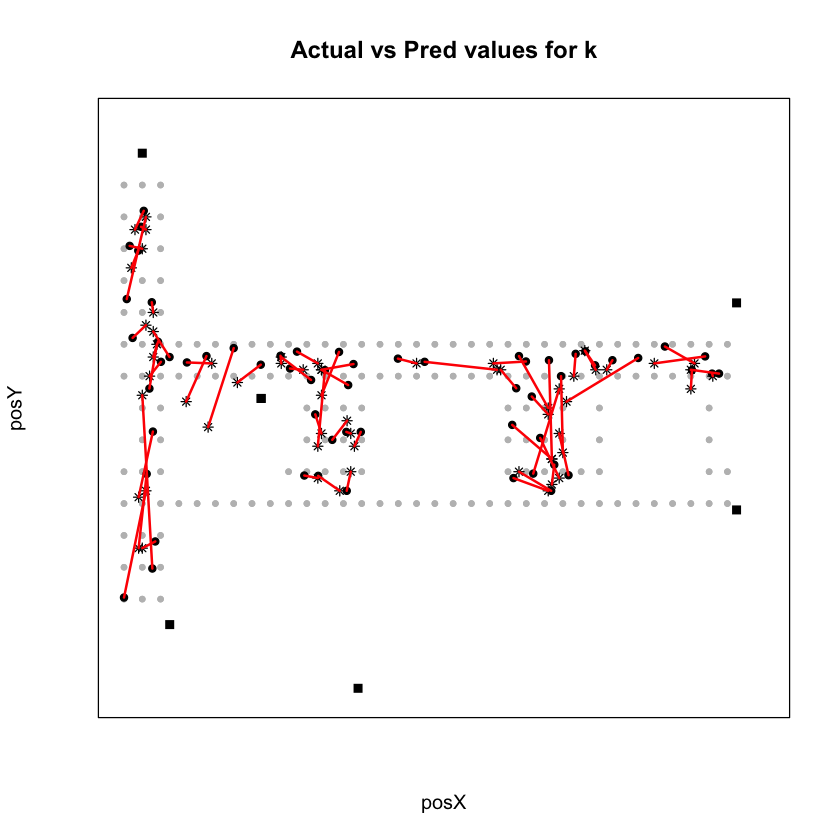

In [38]:

# 1 NN
floorErrorMap(estXYk5, onlineSummary[ , c("posX","posY")], 
              trainPoints = trainPoints, AP = AP)


<a id="weightedknn"></a>
<a href="#weightedknnresults">Back to Top</a>
### Weighted Neighbours

In [39]:
# here is our NN function.
findweightedNN = function(newSignal, trainSubset,num_macs,k) {
  num_cols=3+num_macs
#    print("traindataset")
#    print(head(trainSubset[ , 4:num_cols]))
  diffs = apply(trainSubset[ , 4:num_cols], 1, 
                function(x) x - newSignal)
  dists = apply(diffs, 2, function(x) sqrt(sum(x^2)) )
  #print("dists")
 # print(typeof(dists))
 #               print(dim(dists))
  closest = order(dists)

                odists=dists[closest]

                otrainSubset=trainSubset[closest, 1:3 ]
                inv_odists=1/odists
                #print("sum of invc")
                #print(sum(inv_odists[1:k]))
                #print("weights")
                #print(inv_odists/sum(inv_odists[1:k]))
                wposX=otrainSubset[,2]*(inv_odists/sum(inv_odists[1:k]))
               wposY=otrainSubset[,3]*(inv_odists/sum(inv_odists[1:k]))
#                print("wposY")
#                print(wposY)
  return(cbind(otrainSubset,wposX,wposY))
}

In [53]:
# predict X-Y based on the the neasest k neighbors (default 3)
predweightedXY = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  num_macs=ncol(newSignals)

  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
#      if(i==1) {
#      print("trainSS")
 #     print(trainSS)}
    closeXY[[i]] = 
      #findNN(newSignal = as.numeric(newSignals[i, ]), trainSS,num_macs)
      findweightedNN(newSignal = as.numeric(newSignals[i, ]), trainSS,num_macs,k)
 #     if(i==1) {
#          print("closeXY")
#    print(closeXY[[i]])
#      print("====")}
  }
    #print("closeXY4")
    #print(lapply(closeXY, function(x) sapply(x[ ,2:5], function(y) y)))
    
    #odist_upd = lapply(closeXY, function(x) sapply(x[,4], function(x) sum(x[1:k])))
    #odist_upd =  sapply(closeXY[,4], function(x) sum(x[1:k]))
    #                                               print("odist_upd")
    #                                               print(odist_upd)
    westXY = lapply(closeXY, 
                 function(x) sapply(x[ , 4:5], 
                                    function(x) sum(x[1:k])))
  westXY = do.call("rbind", westXY)
  return(westXY)
#return(closeXY)
}
                                    

                                    
# nearest 3 neighbors                                    
                                    
westXY2k3 = predweightedXY(newSignals = onlineSummary2[ , 6:11], 
                 newAngles = onlineSummary2[ , 4], 
                 offlineSummary2, numAngles = 3, k = 3)

# nearest 1 neighbor
westXY2k1= predweightedXY(newSignals = onlineSummary2[ , 6:11], 
                 newAngles = onlineSummary2[ , 4], 
                 offlineSummary2, numAngles = 3, k = 1)

                                 

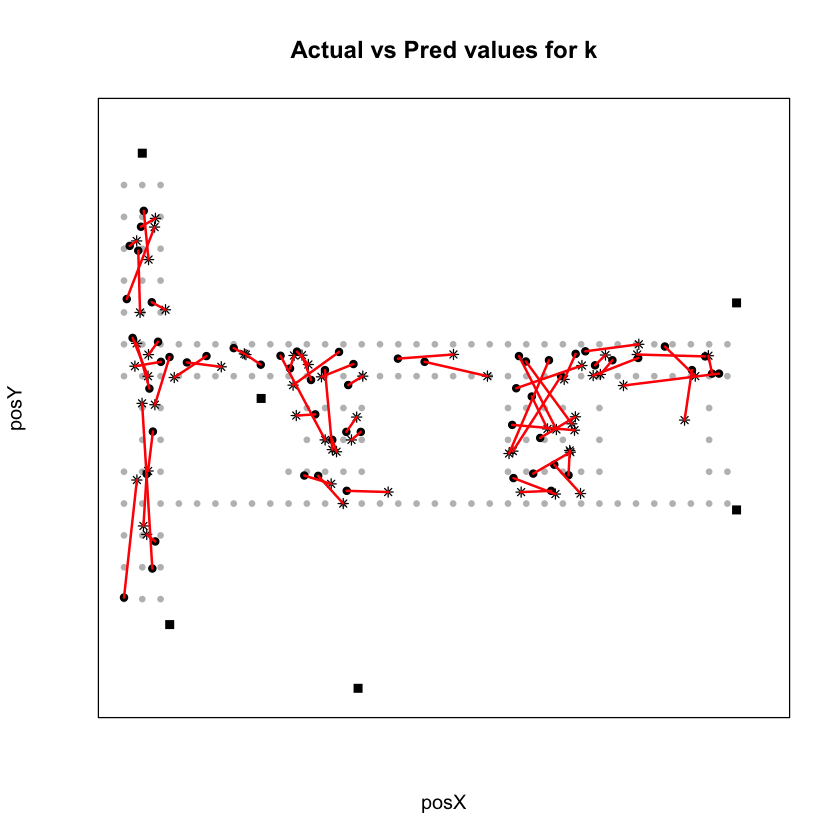

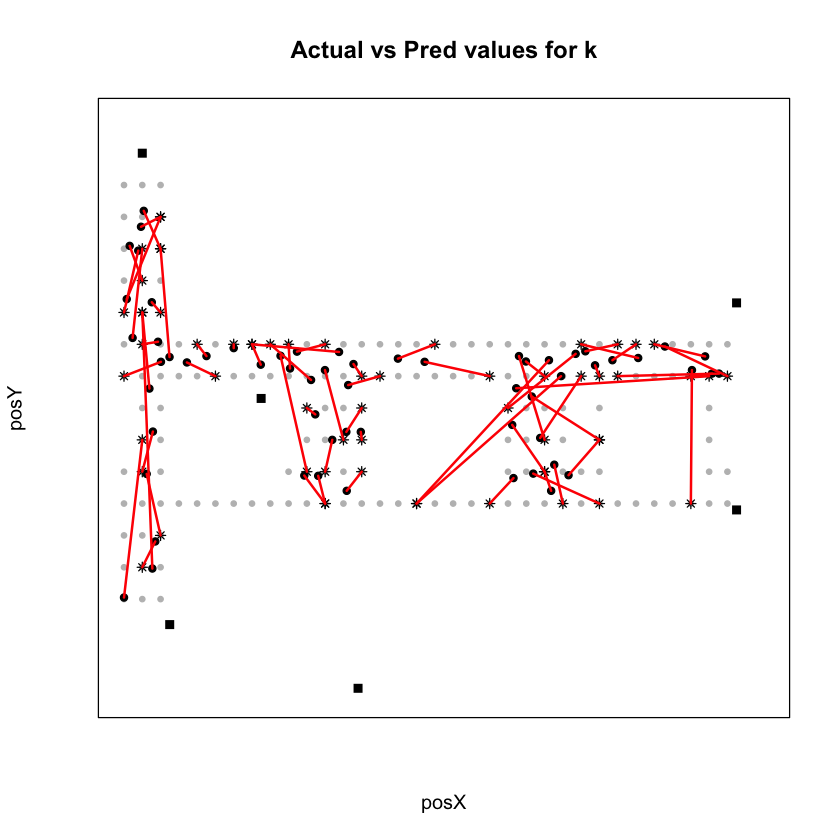

In [41]:
trainPoints2 = offlineSummary2[ offlineSummary2$angle == 0 & 
                              offlineSummary2$mac == "00:0f:a3:39:e1:c0" ,
                        c("posX", "posY")]

# 3 NN

floorErrorMap(westXY2k3, onlineSummary2[ , c("posX","posY")], 
              trainPoints = trainPoints2, AP = AP2)


# 1 NN
floorErrorMap(westXY2k1, onlineSummary2[ , c("posX","posY")], 
              trainPoints = trainPoints2, AP = AP2)





In [42]:
# up to 20 neighbors, 11 folds
# this one can run for a while (5-10 mins)
# this cell and the next are the same, but the angles change slightly!!
#offline1 = offline[ offline$mac != "00:0f:a3:39:e1:c0", ]
#offline2 = offline[ offline$mac != "00:0f:a3:39:dd:cd", ]

cvfold_weighted_calcerror = function(onlineSummary,offlineSummary,offline,num_angles,num_macs){
keepVars = c("posXY", "posX","posY", "orientation", "angle")

actualXY = onlineSummary[ , c("posX", "posY")]

v = 11
num_cols=5+num_macs

permuteLocs = sample(unique(offlineSummary$posXY))

permuteLocs = matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v))

onlineFold = subset(offlineSummary, posXY %in% permuteLocs[ , 1])

onlineCVSummary = reshapeSS_v2(offline, keepVars = keepVars, 
                            sampleAngle = TRUE)

onlineFold = subset(onlineCVSummary, 
                    posXY %in% permuteLocs[ , 1])

offlineFold = subset(offlineSummary,
                     posXY %in% permuteLocs[ , -1])


K = 20
err = rep(0, K)

for (j in 1:v) {
  onlineFold = subset(onlineCVSummary, 
                      posXY %in% permuteLocs[ , j])
  offlineFold = subset(offlineSummary,
                       posXY %in% permuteLocs[ , -j])
  actualFold = onlineFold[ , c("posX", "posY")]
  
  for (k in 1:K) {
    estFold = predweightedXY(newSignals = onlineFold[ , 6:num_cols],
                     newAngles = onlineFold[ , 4], 
                     offlineFold, numAngles = num_angles, k = k)
    err[k] = err[k] + calcError(estFold, actualFold)
  }
}


plot(y = err, x = (1:K),  type = "l", lwd= 2,
     ylim = c(800, 2100),
     xlab = "Number of Neighbors",
     ylab = "Sum of Square Errors")

rmseMin = min(err)
kMin = which(err == rmseMin)[1]
segments(x0 = 0, x1 = kMin, y0 = rmseMin, col = gray(0.4), 
         lty = 2, lwd = 2)
segments(x0 = kMin, x1 = kMin, y0 = 1100,  y1 = rmseMin, 
         col = grey(0.4), lty = 2, lwd = 2)


text(x = kMin - 2, y = rmseMin + 40, 
     label = as.character(round(rmseMin)), col = grey(0.4))


estXYk5 = predweightedXY(newSignals = onlineSummary[ , 6:num_cols], 
                 newAngles = onlineSummary[ , 4], 
                 offlineSummary, numAngles = num_angles, k = 5)


print(calcError(estXYk5, actualXY))
}



<a id="cvweightedknn"></a>
### Weighted KNN Cross Validations on 11 folds and upto 20 neighbors

#### cvfold on dataset with macid="00:0f:a3:39:e1:c0"  included , for num of angles=1

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
“data length [166] is not a sub-multiple or multiple of the number of rows [15]”

[1] 411.8097


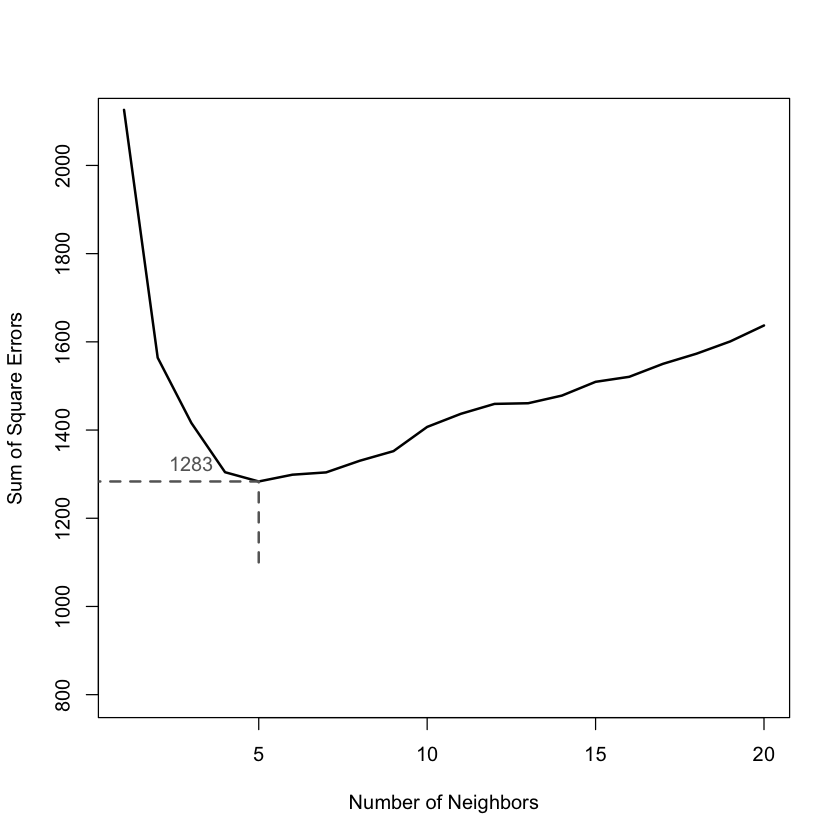

In [43]:
cvfold_weighted_calcerror(onlineSummary2,offlineSummary2,offline2,1,6)


#### cvfold on dataset with macid="00:0f:a3:39:e1:c0"  included , for num of angles=3

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
“data length [166] is not a sub-multiple or multiple of the number of rows [15]”

[1] 273.1212


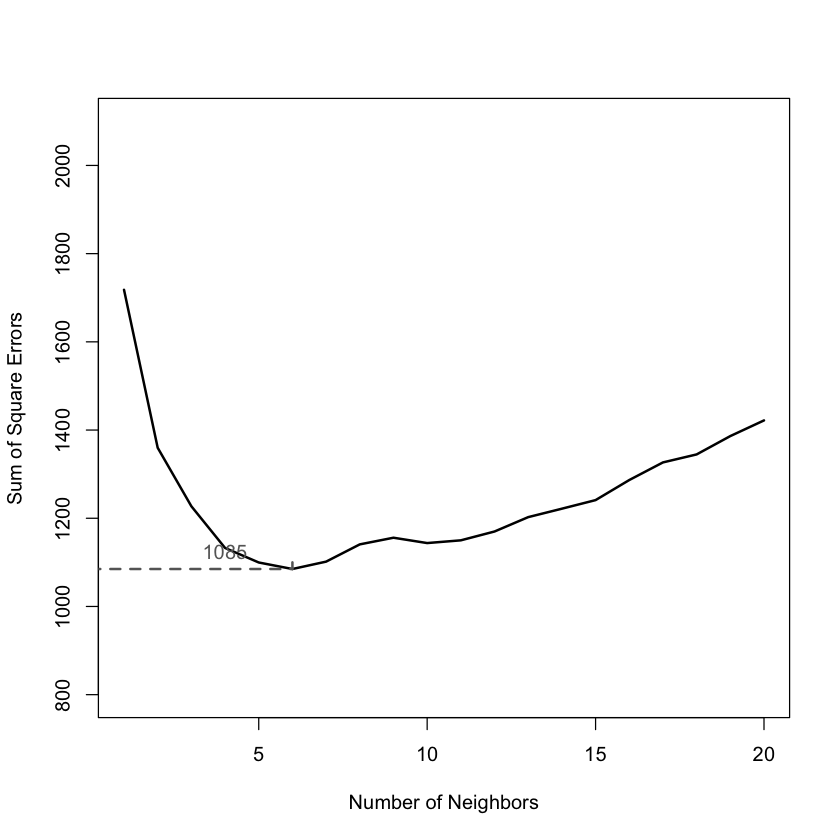

In [44]:
cvfold_weighted_calcerror(onlineSummary2,offlineSummary2,offline2,3,6)

#### cvfold on dataset with macid="00:0f:a3:39:dd:cd" included , for num of angles=1

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
“data length [166] is not a sub-multiple or multiple of the number of rows [15]”

[1] 271.999


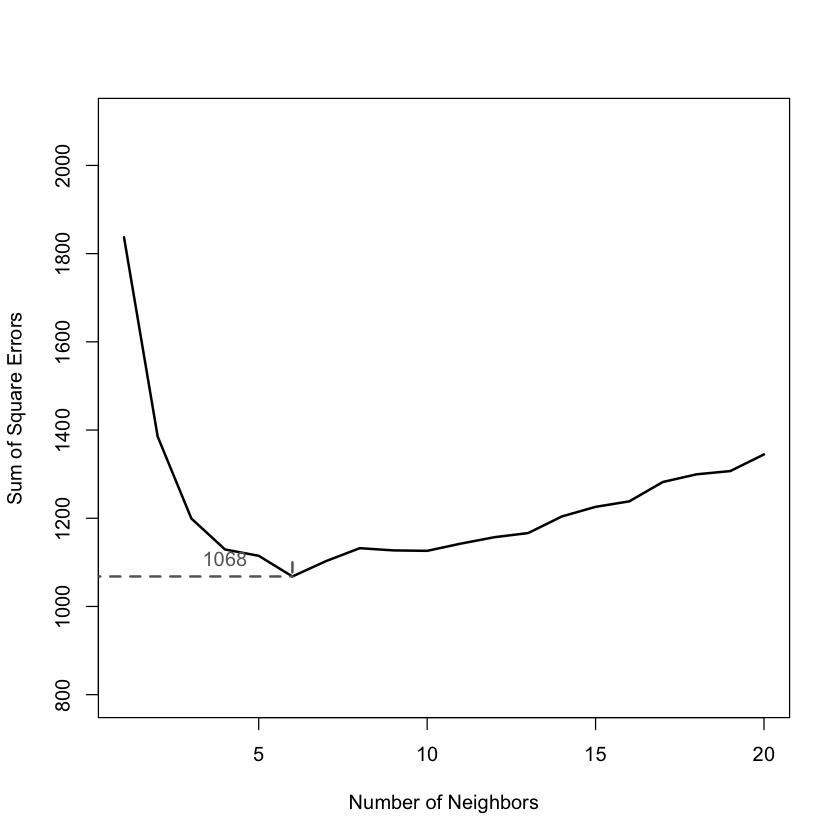

In [45]:
cvfold_weighted_calcerror(onlineSummary1,offlineSummary1,offline1,1,6)

#### cvfold on dataset with macid="00:0f:a3:39:dd:cd" included , for num of angles=3

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
“data length [166] is not a sub-multiple or multiple of the number of rows [15]”

[1] 241.5056


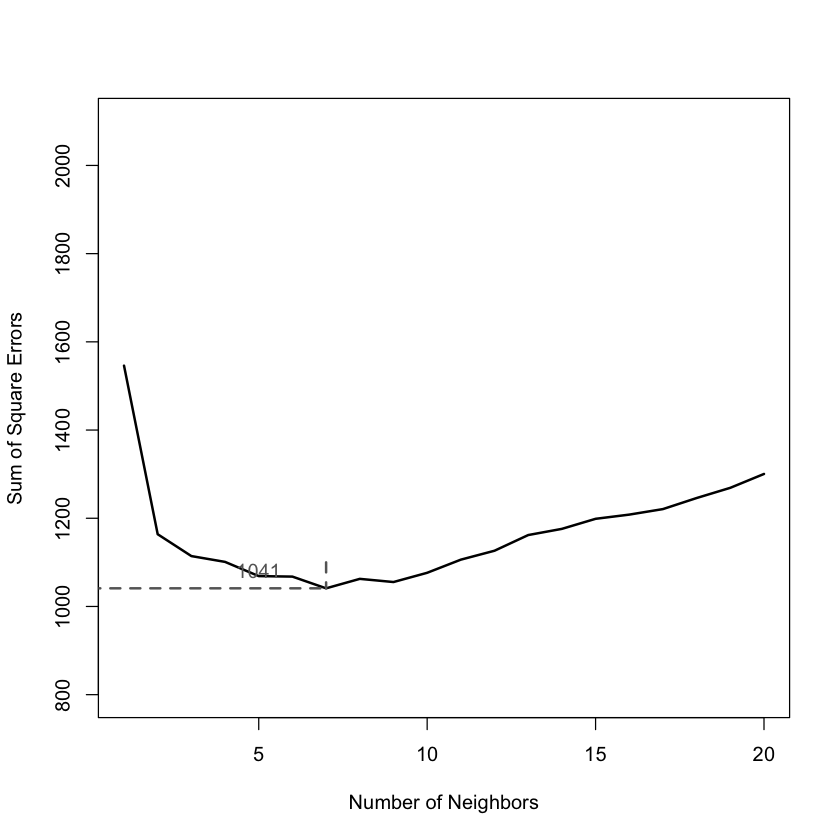

In [46]:
cvfold_weighted_calcerror(onlineSummary1,offlineSummary1,offline1,3,6)

#### cvfold on dataset with 7 access points included , for num of angles=1

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
“data length [166] is not a sub-multiple or multiple of the number of rows [15]”

[1] 288.5341


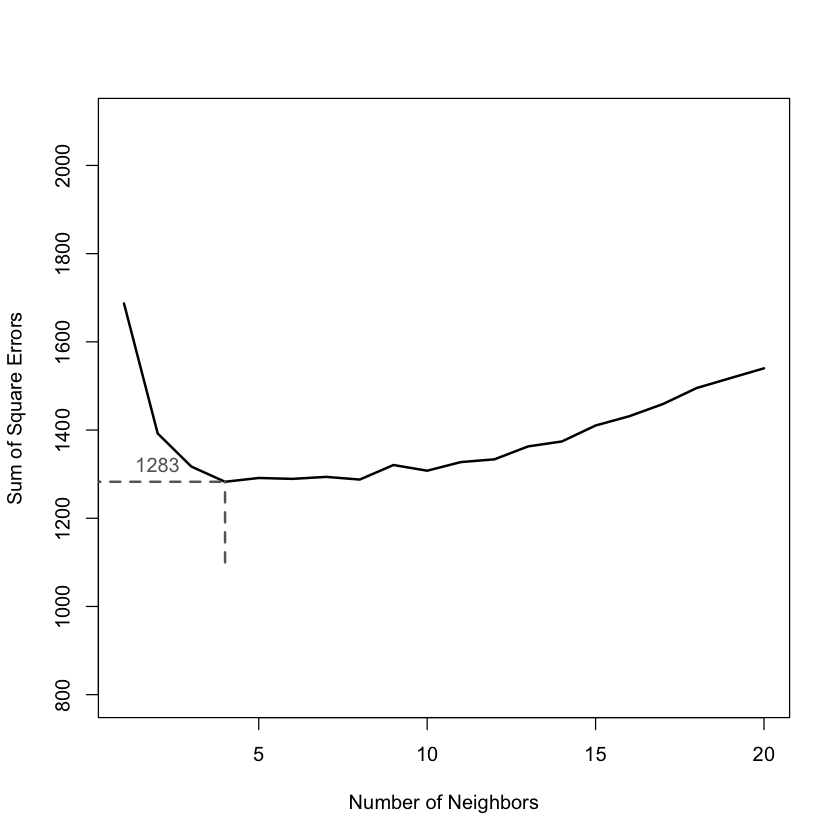

In [47]:
cvfold_weighted_calcerror(onlineSummary,offlineSummary,offline,1,7)

#### cvfold on dataset with 7 access points included , for num of angles=3

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
“data length [166] is not a sub-multiple or multiple of the number of rows [15]”

[1] 209.2446


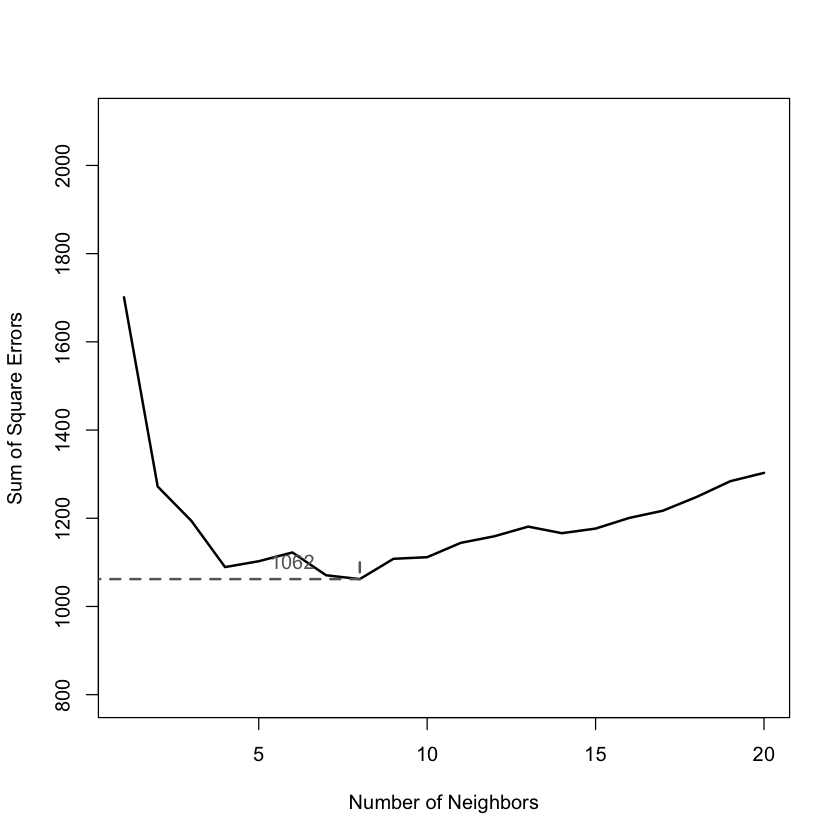

In [48]:
cvfold_weighted_calcerror(onlineSummary,offlineSummary,offline,3,7)

<a href="#weightedknnresults">Back to Weighted KNN Results</a>

In [49]:
macs_observed=c("00:0f:a3:39:dd:cd", "00:0f:a3:39:e1:c0" ,   "all" )
weighted_calc_error_angle1=c(271.99,411.81,288.53)
weighted_calc_error_angle3=c(241.50,273.12,209.24)

In [50]:
weighted_calc_error_table=cbind(macs_observed,weighted_calc_error_angle1,weighted_calc_error_angle3)
weighted_calc_error_table

macs_observed,weighted_calc_error_angle1,weighted_calc_error_angle3
00:0f:a3:39:dd:cd,271.99,241.5
00:0f:a3:39:e1:c0,411.81,273.12
all,288.53,209.24


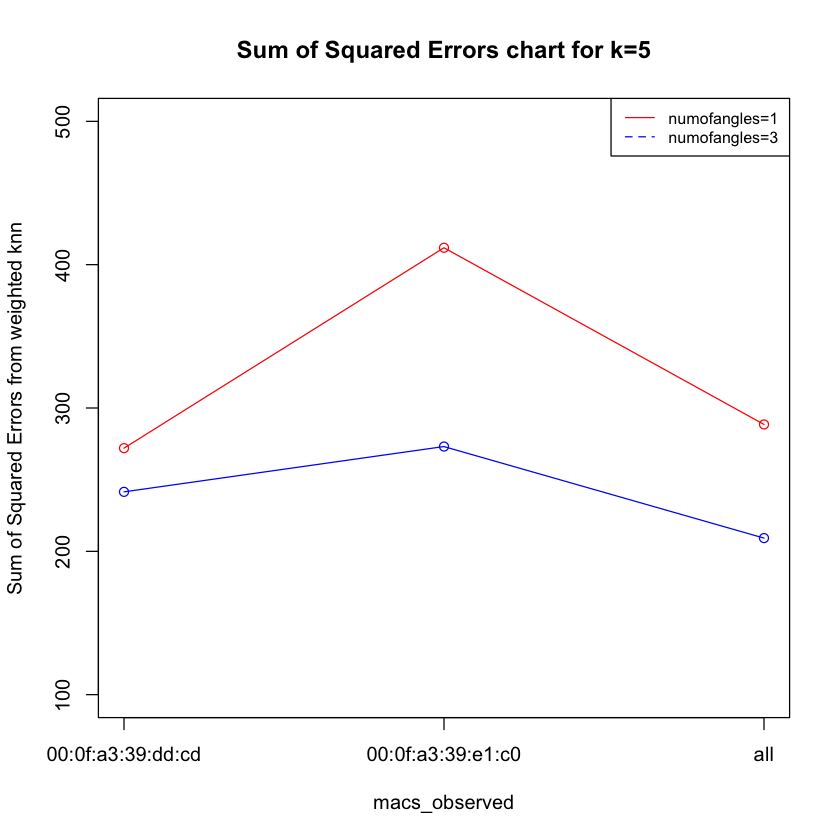

In [51]:
plot(weighted_calc_error_angle1, type='o',col="red",xlab = "macs_observed",ylab="Sum of Squared Errors from weighted knn",main="Sum of Squared Errors chart for k=5", xaxt = "n",ylim=range(100:500))
lines(weighted_calc_error_angle3, type="o", col="blue")
axis(1, at=1:3, labels=macs_observed[1:3])
legend("topright", legend=c("numofangles=1", "numofangles=3"), col=c("red", "blue"), lty=1:2, cex=0.8)

#### Floor Map Plan for actual vs Predicted values from the best case of k=5 nearest neighbours using Weighted KNN

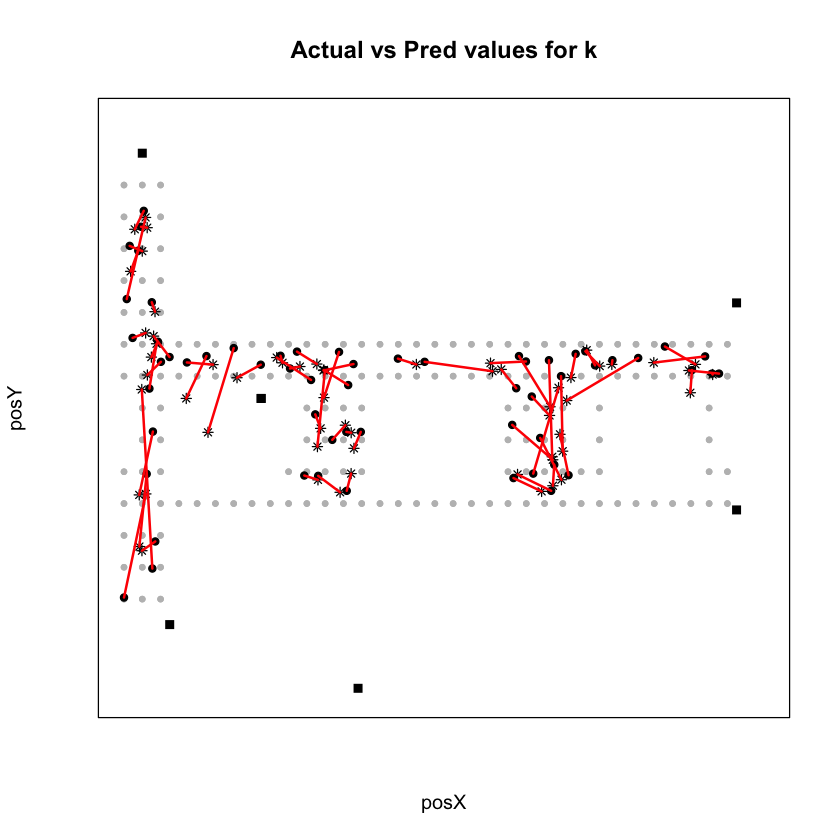

In [54]:
# nearest 5 neighbors
westXY2k5= predweightedXY(newSignals = onlineSummary[ , 6:12], 
                 newAngles = onlineSummary[ , 4], 
                 offlineSummary, numAngles = 3, k = 5)   

# 5 NN
floorErrorMap(westXY2k5, onlineSummary[ , c("posX","posY")], 
              trainPoints = trainPoints, AP = AP)